In [ ]:
#importing the required libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading the dataset
dataset = pd.read_csv("/content/drive/MyDrive/household_power_consumption.txt", sep=";", header=0, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col='datetime')
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


# **DATA PREPROCESSING**

In [ ]:
dataset.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [ ]:
#checking for the null values
dataset.loc[dataset.Sub_metering_3.isnull()].head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,?,?,?,?,?,?,NaN
2006-12-21 11:24:00,?,?,?,?,?,?,NaN
2006-12-30 10:08:00,?,?,?,?,?,?,NaN
2006-12-30 10:09:00,?,?,?,?,?,?,NaN
2007-01-14 18:36:00,?,?,?,?,?,?,NaN


In [ ]:
#replacing the null values
dataset.replace('?', np.nan, inplace=True)

In [ ]:
dataset.loc[dataset.Sub_metering_3.isnull()].head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-21 11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-14 18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#dropping the null values
dataset = dataset.dropna(how = 'all')

In [ ]:
dataset

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0


In [ ]:
dataset.shape

(2049280, 7)

In [ ]:
dataset.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
#changing the datatype of each column to float
for i in dataset.columns:
    dataset[i] = dataset[i].astype('float64')


In [ ]:
dataset.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

# **DATA VISUALIZATION**

<Axes: xlabel='Global_active_power', ylabel='Density'>

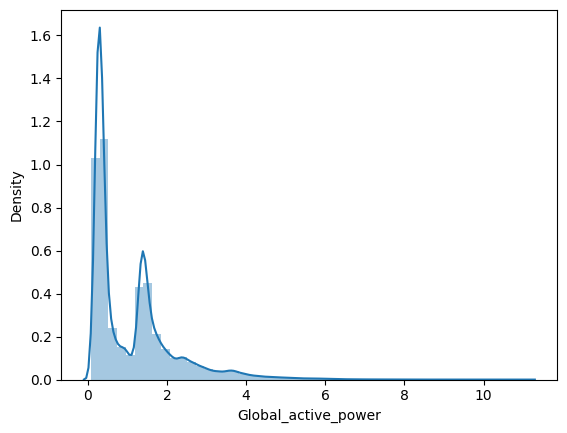

In [ ]:
#plotting the distribution plot
sns.distplot(dataset['Global_active_power'])

<Axes: xlabel='Global_reactive_power'>

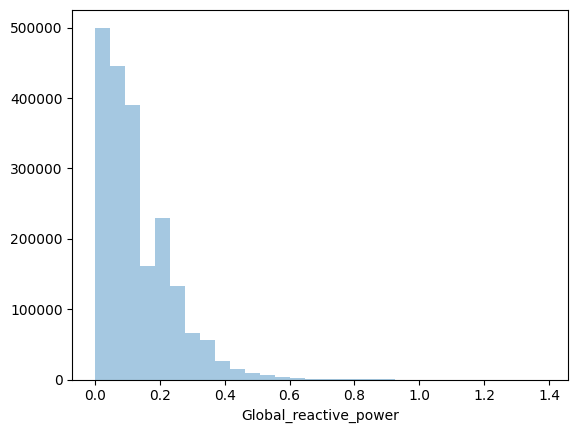

In [ ]:
sns.distplot(dataset['Global_reactive_power'],kde=False,bins=30)

<Axes: xlabel='Voltage', ylabel='Density'>

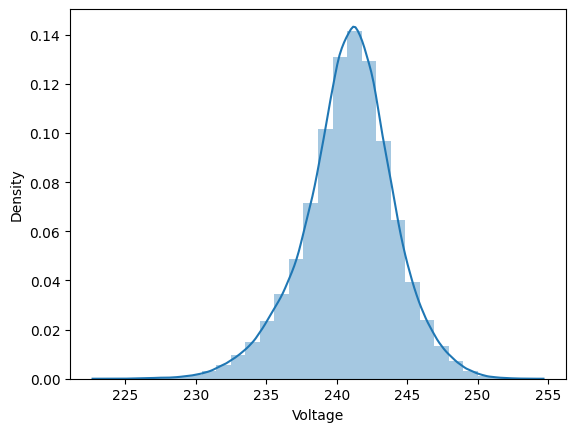

In [ ]:
sns.distplot(dataset['Voltage'],kde=True,bins=30)

<Axes: xlabel='Global_intensity', ylabel='Density'>

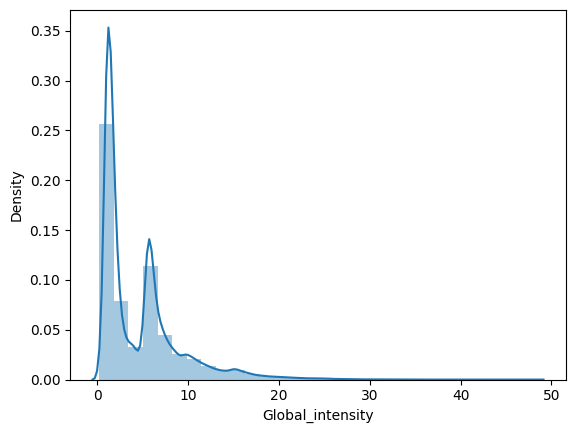

In [ ]:
sns.distplot(dataset['Global_intensity'],kde=True,bins=30)

In [ ]:
#correlation of dataset values
dataset.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


<Axes: >

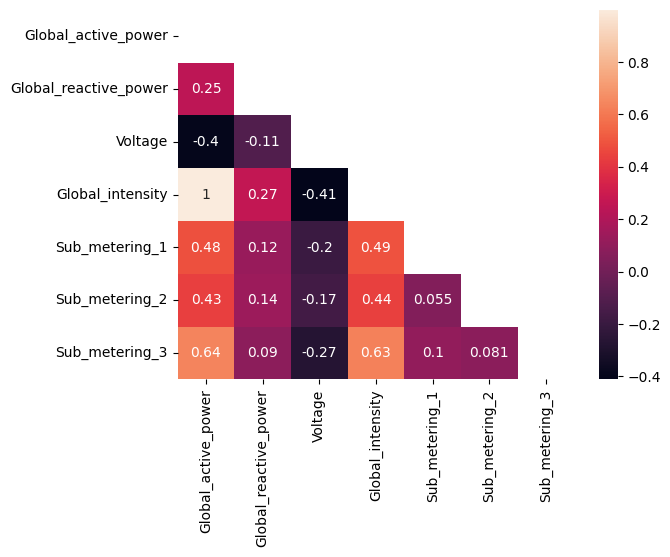

In [ ]:
#using heatmap for analysis

pearson = dataset.corr(method='pearson')
mask = np.zeros_like(pearson)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(pearson,mask=mask, annot=True)

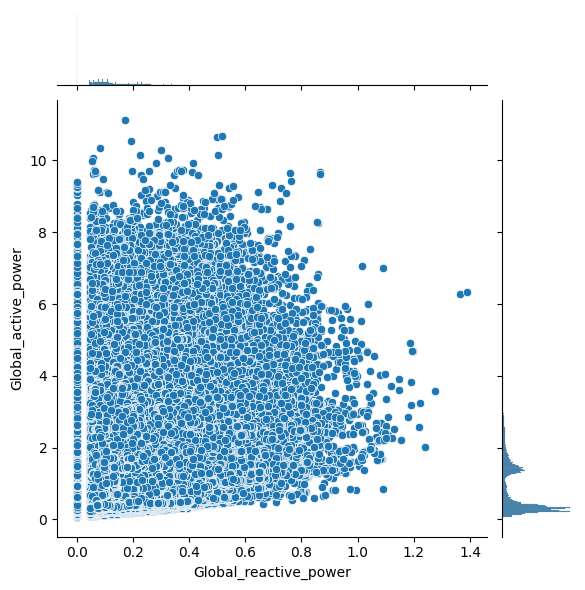

In [ ]:
sns.jointplot(x='Global_reactive_power',y='Global_active_power',data = dataset,kind='scatter')

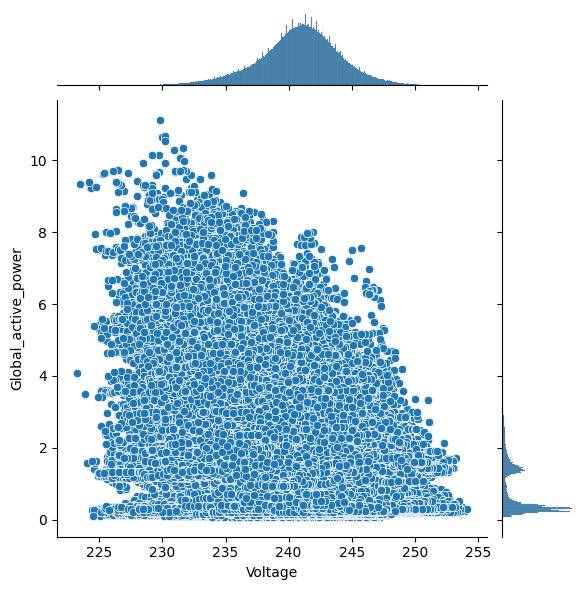

In [ ]:
sns.jointplot(x='Voltage',y='Global_active_power',data = dataset, kind='scatter')

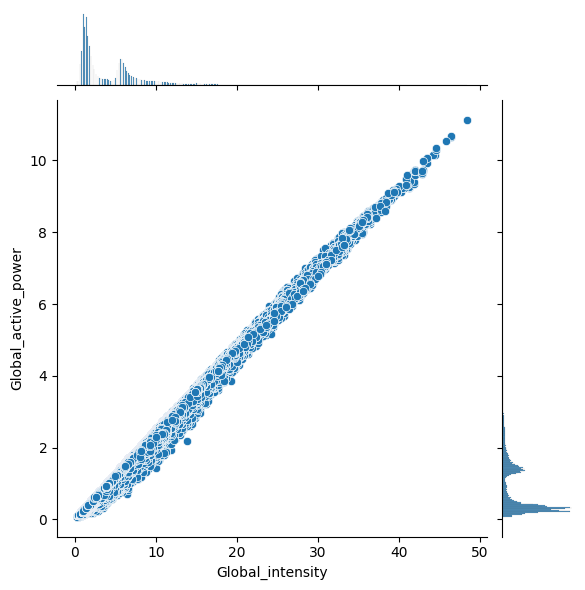

In [ ]:
sns.jointplot(x='Global_intensity',y='Global_active_power',data = dataset,kind='scatter')

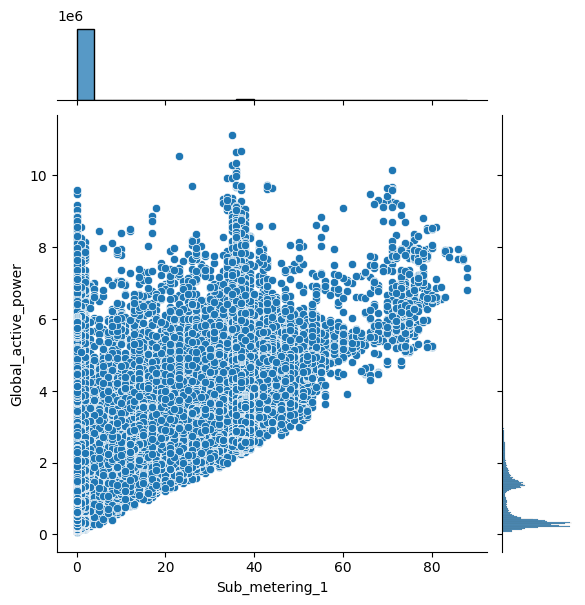

In [ ]:
sns.jointplot(x='Sub_metering_1',y='Global_active_power',data = dataset,kind='scatter')

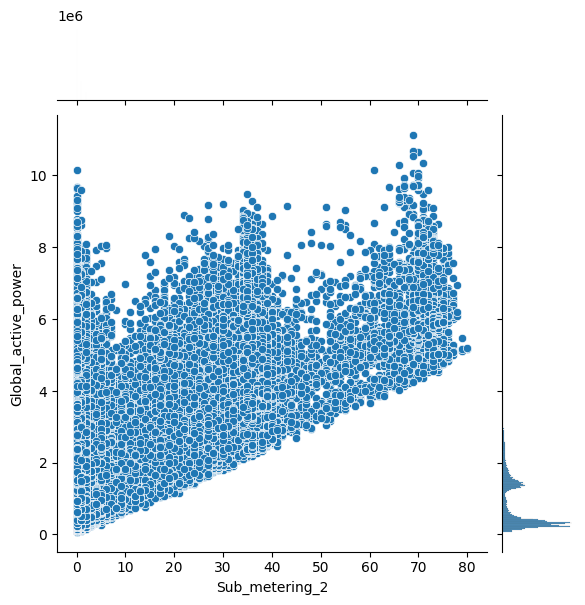

In [ ]:
sns.jointplot(x='Sub_metering_2',y='Global_active_power',data = dataset,kind='scatter')

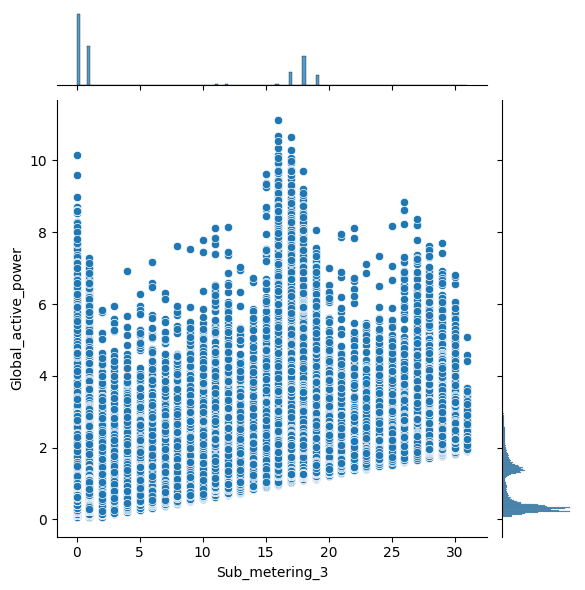

In [ ]:
sns.jointplot(x='Sub_metering_3',y='Global_active_power',data = dataset,kind='scatter')

In [ ]:
#dividing the dependent and independent variables

#the independent variables are taken in 'x'
x = ['Global_reactive_power','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']

#the dependent variables are taken in 'y'
y = ['Global_active_power']

In [ ]:
y=dataset['Global_active_power']
y.head()

datetime
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
Name: Global_active_power, dtype: float64

In [ ]:
X = dataset[x]
X.head()

,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,
2006-12-16 17:24:00,0.418,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,0.436,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,0.498,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,0.502,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,0.528,15.8,0.0,1.0,17.0


# Splitting the data into train data and test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1434496, 5)
(614784, 5)
(1434496,)
(614784,)


# **MODEL BUILDING**

# MODEL-1
LINEAR REGRESSION

In [ ]:
#importing the linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
#predicting the values
pred=lr.predict(X_test)
print("The predicted values are:",pred)
#checking the metrics
from sklearn import metrics
MSE = metrics.mean_squared_error(y_test, pred)
print('MSE:', MSE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, pred))
print('RMSE:', RMSE)
MAE = metrics.mean_absolute_error(y_test, pred)
print('MAE:', MAE)
R2 = metrics.r2_score(y_test, pred)*100
print('R2:', R2)

The predicted values are: [3.92903992 0.68716386 0.24165406 ... 1.56079602 0.57516828 1.54812955]
MSE: 0.0018226463072696967
RMSE: 0.042692461949033776
MAE: 0.027455608456450082
R2: 99.83631695586827


In [ ]:
#predicting the values
pred=lr.predict(X_test)
print("The predicted values are:",pred)

The predicted values are: [3.92903992 0.68716386 0.24165406 ... 1.56079602 0.57516828 1.54812955]


In [ ]:
#checking the metrics
from sklearn import metrics
MSE = metrics.mean_squared_error(y_test, pred)
print('MSE:', MSE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, pred))
print('RMSE:', RMSE)
MAE = metrics.mean_absolute_error(y_test, pred)
print('MAE:', MAE)
R2 = metrics.r2_score(y_test, pred)*100
print('R2:', R2)

MSE: 0.0018226463072696967
RMSE: 0.042692461949033776
MAE: 0.027455608456450082
R2: 99.83631695586827


# MODEL 2
RANDOM FOREST REGRESSOR

In [ ]:
#importing the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
#predicting the values
prediction = rf.predict(X_test)
print("the predicted values:",prediction)
#checking the metrics
mse1 = metrics.mean_squared_error(y_test, prediction)
print("MSE:",mse1)
rmse1 = np.sqrt(metrics.mean_squared_error(y_test, prediction))
print('RMSE:',rmse1)
mae1 = metrics.mean_absolute_error(y_test, prediction)
print('MAE:',mae1)
r2 = metrics.r2_score(y_test, prediction)*100
print("R2:",r2)

the predicted values: [3.84058    0.69300305 0.23349556 ... 1.5651324  0.58186286 1.55113471]
MSE: 0.0012594779157744291
RMSE: 0.035489123908240244
MAE: 0.021358545515324512
R2: 99.88689238364657


In [ ]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
#predicting the values
prediction = rf.predict(X_test)
prediction

array([3.84062   , 0.69219527, 0.23350495, ..., 1.56501884, 0.58179132,
       1.55011669])

In [ ]:
#checking the metrics
mse1 = metrics.mean_squared_error(y_test, prediction)
print("MSE:",mse1)
rmse1 = np.sqrt(metrics.mean_squared_error(y_test, prediction))
print('RMSE:',rmse1)
mae1 = metrics.mean_absolute_error(y_test, prediction)
print('MAE:',mae1)
r2 = metrics.r2_score(y_test, prediction)*100
print("R2:",r2)

MSE: 0.0012592136619512463
RMSE: 0.03548540068748338
MAE: 0.021361100195576195
R2: 99.88691611500357


# MODEL 3
DECISION TREE REGRESSOR

In [ ]:
#importing the Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train,y_train)

#predicting the values
y_pred = regressor.predict(X_test)
print("The predicted values are:",y_pred)

#checking the metrics
mse2 = metrics.mean_squared_error(y_test, y_pred)
print("MSE:",mse1)
rmse2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse1)
mae2 = metrics.mean_absolute_error(y_test, y_pred)
print('MAE:',mae2)
r2score = metrics.r2_score(y_test,y_pred)*100
print("R2:",r2score)

The predicted values are: [3.862      0.69       0.23350997 ... 1.56502407 0.58173848 1.55066667]
MSE: 0.0012594779157744291
RMSE: 0.035489123908240244
MAE: 0.022756769511553795
R2: 99.8593573865134


In [ ]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
#predicting the values
y_pred = regressor.predict(X_test)
y_pred

In [ ]:
#checking the metrics
mse2 = metrics.mean_squared_error(y_test, y_pred)
print("MSE:",mse1)
rmse2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse1)
mae2 = metrics.mean_absolute_error(y_test, y_pred)
print('MAE:',mae2)
r2score = metrics.r2_score(y_test,y_pred)*100
print("R2:",r2score)

MSE: 0.0012592136619512463
RMSE: 0.03548540068748338
MAE: 0.022759252986480513
R2: 99.85935341779978


#Model 4
 XGBoost Regressor

In [ ]:
#importing the XGBoost Regressor
import xgboost
from xgboost import XGBRegressor
xgbr= XGBRegressor()

xgbr.fit(X_train,y_train)
#predicting the values
ypred = xgbr.predict(X_test)
print("The predicted values are:",ypred)

#checking the metrics
mse3= metrics.mean_squared_error(y_test, y_pred)
print("MSE:",mse3)
rmse3 = np.sqrt(metrics.mean_squared_error(y_test, ypred))
print('RMSE:',rmse3)
mae3 = metrics.mean_absolute_error(y_test, ypred)
print('MAE:',mae3)
r2_Score = metrics.r2_score(y_test, ypred)*100
print("R2:",r2_Score)

The predicted values are: [3.8290553 0.709917  0.2338253 ... 1.5620869 0.5759181 1.5481534]
MSE: 0.0015660860993631205
RMSE: 0.033831248936509274
MAE: 0.020863928648037145
R2: 99.89721319781589


In [ ]:
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
score = xgbr.score(X_train,y_train)
print("The training score",score)

The training score 0.9990013412238764


In [ ]:
#predicting the values
ypred = xgbr.predict(X_test)
print("The predicted values are:",ypred)

array([3.8290553, 0.709917 , 0.2338253, ..., 1.5620869, 0.5759181,
       1.5481534], dtype=float32)

In [ ]:
#checking the metrics
mse3= metrics.mean_squared_error(y_test, y_pred)
print("MSE:",mse3)
rmse3 = np.sqrt(metrics.mean_squared_error(y_test, ypred))
print('RMSE:',rmse3)
mae3 = metrics.mean_absolute_error(y_test, ypred)
print('MAE:',mae3)
r2_Score = metrics.r2_score(y_test, ypred)*100
print("R2:",r2_Score)

MSE: 0.0015661302918525675
RMSE: 0.033831248936509274
MAE: 0.020863928648037145
R2: 99.89721319781589


In [ ]:
#xgboost regressor
xgbr.predict([[0.502,	23.000, 0.000,	1.000,	17.0]]) #expected output 5.388

array([5.360448], dtype=float32)

In [ ]:
#linear regression
lr.predict([[0.502,	23.000, 0.000,	1.000,	17.0]])

array([5.39663281])

In [ ]:
#Random forest regressor
rf.predict([[0.502,	23.000, 0.000,	1.000,	17.0]])

array([5.36088])

In [ ]:
#decision tree regressor
regressor.predict([[0.502,	23.000, 0.000,	1.000,	17.0]])

array([5.296])

In [ ]:
model = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest Regressor','Decision Tree Regressor','XGBoost Regressor'],
    'MSE': [MSE,mse1,mse2,mse3],
    'R2_Score': [R2,r2,r2score,r2_Score]
    })

model

,Model,MSE,R2_Score
0,Linear Regression,0.001823,99.836317
1,Random Forest Regressor,0.001259,99.886916
2,Decision Tree Regressor,0.001566,99.859353
3,XGBoost Regressor,0.001566,99.897213


In [ ]:
import pickle
filename="PCA_model.pkl"
pickle.dump(xgbr,open(filename, 'wb'))